### Multiclass Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [2]:
flight_data = pd.read_csv("/teamspace/studios/this_studio/Flight_delay_analysis/data/preprocessed_flight_data_for_binary_classification.csv")
flight_data.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,target
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,9,1,2,2019,False
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,19,11,5,2022,False
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,7,4,2022,True
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,-0.138889,-0.051551,1.456688,-0.017174,-0.178016,6,3,0,2023,True
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,23,2,6,2020,False
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,4.305829,-0.051551,-0.157574,-0.017174,-0.178016,31,7,2,2019,True
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,11,6,6,2023,False
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,-0.138889,-0.051551,1.389428,-0.017174,-0.178016,8,7,0,2019,True
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,12,2,6,2023,False
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,8,5,2020,True


In [3]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476398 entries, 0 to 3476397
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   airline                  float64
 1   airline_dot              float64
 2   airline_code             float64
 3   dot_code                 float64
 4   fl_number                float64
 5   origin                   float64
 6   origin_city              float64
 7   dest                     float64
 8   dest_city                float64
 9   crs_dep_time             float64
 10  dep_time                 float64
 11  dep_delay                float64
 12  taxi_out                 float64
 13  wheels_off               float64
 14  wheels_on                float64
 15  taxi_in                  float64
 16  crs_arr_time             float64
 17  arr_time                 float64
 18  arr_delay                float64
 19  cancelled                bool   
 20  diverted                 bool   
 21  crs_elap

In [4]:
flight_data.isna().sum()

airline                    0
airline_dot                0
airline_code               0
dot_code                   0
fl_number                  0
origin                     0
origin_city                0
dest                       0
dest_city                  0
crs_dep_time               0
dep_time                   0
dep_delay                  0
taxi_out                   0
wheels_off                 0
wheels_on                  0
taxi_in                    0
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
diverted                   0
crs_elapsed_time           0
elapsed_time               0
air_time                   0
distance                   0
delay_due_carrier          0
delay_due_weather          0
delay_due_nas              0
delay_due_security         0
delay_due_late_aircraft    0
day                        0
month                      0
day_of_week                0
year                       0
target        

In [5]:
# Drop or keep the original target column based on necessity
flight_data = flight_data.drop(columns=['target'])

In [6]:
flight_data.columns

Index(['airline', 'airline_dot', 'airline_code', 'dot_code', 'fl_number',
       'origin', 'origin_city', 'dest', 'dest_city', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
       'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'day', 'month',
       'day_of_week', 'year'],
      dtype='object')

In [7]:
# Define conditions for each delay type
conditions = [
    (flight_data['delay_due_carrier'] > 0),
    (flight_data['delay_due_weather'] > 0),
    (flight_data['delay_due_nas'] > 0),
    (flight_data['delay_due_security'] > 0),
    (flight_data['delay_due_late_aircraft'] > 0),
]

# Assign class labels for each condition
classes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Create the new target column
flight_data['delay_category'] = np.select(conditions, classes, default='no_delay')

In [8]:
flight_data.sample(20)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,delay_category
1938659,1.286792,1.286792,0.884229,0.001871,-0.189746,0.746676,-1.058240,0.755647,0.653341,0.211859,0.181230,-0.386560,1.695394,0.199796,0.514443,-1.071517,0.497391,0.504346,-0.256689,False,False,-0.101678,-0.017062,-0.143630,-0.157106,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,4,0,2019,no_delay
2481850,0.945543,0.945543,1.060067,-1.546032,-1.345844,0.707441,0.710489,0.373460,0.738843,0.160406,0.139175,-0.304340,-0.724880,0.113944,0.516339,0.220588,0.507166,0.521266,-0.177429,False,False,0.317571,0.406513,0.494724,0.441642,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,24,6,3,2021,no_delay
261651,0.945543,0.945543,1.060067,-1.546032,-0.942926,0.403365,-1.058240,-1.331680,-1.284719,0.438253,0.571747,0.538417,0.705282,0.571157,0.882258,-0.425465,0.702651,0.876582,0.793508,False,False,-0.171553,0.025296,-0.027565,0.087836,0.964410,-0.051551,0.380514,-0.017174,-0.138743,13,3,0,2023,carrier_delay
1627983,0.945543,0.945543,1.060067,-1.546032,-1.318372,0.403365,-1.058240,0.755647,0.653341,0.036919,0.055064,0.065651,-0.944905,0.105957,0.351391,-0.748491,0.311680,0.346428,-0.038724,False,False,-0.241428,-0.313564,-0.129121,-0.179219,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,12,12,3,2019,no_delay
2024451,-0.931329,-0.931329,-1.577495,1.024971,1.226187,0.050245,0.596378,-0.753500,-0.809704,1.238865,1.593097,2.203377,1.365356,1.601384,1.627369,0.382101,1.287152,1.624814,1.962596,False,False,-0.031803,-0.144134,-0.361250,-0.510911,3.107962,-0.051551,-0.157574,-0.017174,-0.178016,5,4,1,2022,carrier_delay
237830,0.945543,0.945543,1.060067,-1.546032,2.275832,1.089987,0.910185,-1.214084,-1.446224,-0.055697,-0.061090,-0.201565,-0.944905,-0.089706,-0.078991,-0.586978,-0.089064,-0.078447,-0.454840,False,False,-0.520927,-0.708900,-0.549855,-0.607867,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,7,12,5,2019,no_delay
1507293,-1.101954,-1.101954,-0.874146,-0.493776,-0.198903,-1.215102,-1.448121,-1.586470,-1.493725,0.654357,0.621813,-0.283785,-0.834893,0.593119,0.675599,-0.425465,0.669418,0.671665,-0.236874,False,False,-0.479002,-0.454756,-0.317726,-0.395244,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,12,6,4,2020,no_delay
66915,0.604293,0.604293,1.411742,1.260868,0.679616,1.737374,1.575835,0.745847,-1.056712,-1.228829,-1.220623,-0.386560,-0.504855,-1.237730,-1.400472,1.351180,-1.451597,-1.366233,-0.217059,False,False,-0.898251,-0.793615,-0.869032,-0.995693,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,9,2,2021,no_delay
62129,-1.272579,-1.272579,-1.401658,-0.454018,-0.370029,-0.096889,1.775531,-0.831897,-0.885707,1.232690,1.204583,-0.078234,-0.834893,1.174119,1.075646,-0.586978,1.081892,1.066460,-0.256689,False,False,-0.898251,-1.033641,-0.898048,-0.818790,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,9,6,3,2022,no_delay
1542893,-1.272579,-1.272579,-1.401658,-0.454018,-0.473620,0.481836,0.387173,0.040272,-0.106683,-1.018900,-1.006339,-0.283785,0.375244,-1.008125,-0.989049,-0.263951,-1.041078,-0.977077,-0.276504,False,False,-0.786451,-0.793615,-0.840016,-0.806883,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,6,7,3,2023,no_delay


In [9]:
flight_data.delay_category.value_counts()

delay_category
no_delay               2728958
carrier_delay           368739
nas_delay               199553
late_aircraft_delay     134507
weather_delay            42448
security_delay            2193
Name: count, dtype: int64

In [10]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476398 entries, 0 to 3476397
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   airline                  float64
 1   airline_dot              float64
 2   airline_code             float64
 3   dot_code                 float64
 4   fl_number                float64
 5   origin                   float64
 6   origin_city              float64
 7   dest                     float64
 8   dest_city                float64
 9   crs_dep_time             float64
 10  dep_time                 float64
 11  dep_delay                float64
 12  taxi_out                 float64
 13  wheels_off               float64
 14  wheels_on                float64
 15  taxi_in                  float64
 16  crs_arr_time             float64
 17  arr_time                 float64
 18  arr_delay                float64
 19  cancelled                bool   
 20  diverted                 bool   
 21  crs_elap

/tmp/ipykernel_16315/2276662804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_data, x='delay_category',palette='magma')


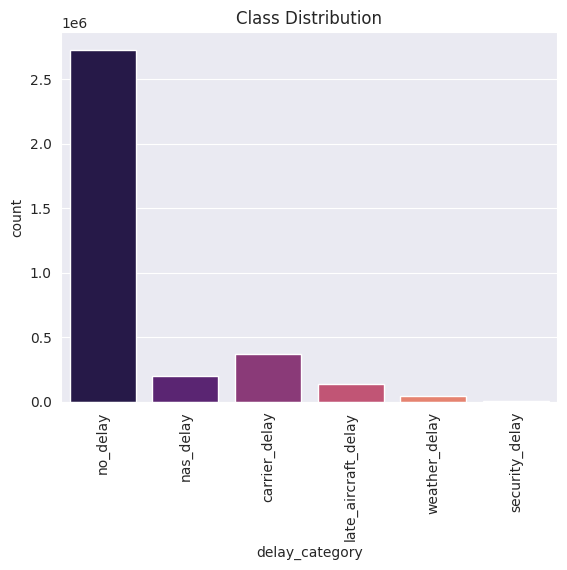

In [11]:
# Visualize the distribution

sns.countplot(data=flight_data, x='delay_category',palette='magma')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


### Data Preparation

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [14]:
flight_data.columns

Index(['airline', 'airline_dot', 'airline_code', 'dot_code', 'fl_number',
       'origin', 'origin_city', 'dest', 'dest_city', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
       'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'day', 'month',
       'day_of_week', 'year', 'delay_category'],
      dtype='object')

In [15]:
# drop the delay category columns 

features_to_drop = [
    'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
    'delay_due_security', 'delay_due_late_aircraft'
]

flight_data = flight_data.drop(columns=features_to_drop)

flight_data.sample(5)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,day,month,day_of_week,year,delay_category
2351531,0.774918,0.774918,0.532554,0.868591,1.451111,1.815845,1.651910,-0.841697,-0.828705,-0.629914,-0.639855,-0.407115,-0.614868,-0.660723,-0.680009,0.866641,-0.695069,-0.657481,-0.415210,False,False,-0.954151,-0.977164,-0.999604,-0.936158,29,10,4,2021,no_delay
2637099,-1.101954,-1.101954,-0.874146,-0.493776,-0.713424,-1.587840,-1.495668,1.275028,1.318361,0.036919,0.023021,-0.263230,-0.724880,-0.001857,-0.058135,-0.586978,-0.091019,-0.057767,-0.217059,False,False,-1.163776,-1.146594,-1.028620,-1.012702,2,11,5,2019,no_delay
1330061,-0.931329,-0.931329,-1.577495,1.024971,1.496897,0.118907,0.101894,-0.753500,-0.809704,0.201569,0.169214,-0.407115,-0.834893,0.141895,-0.039176,0.059075,0.041911,-0.031448,-0.494470,False,False,-1.331475,-1.414858,-1.347797,-1.250841,12,7,0,2021,no_delay
1594107,0.604293,0.604293,1.411742,1.260868,1.816254,-0.754084,-0.810998,1.157432,1.052353,1.611386,1.551041,-0.304340,-0.614868,1.523518,1.445357,-0.425465,1.488502,1.434936,-0.494470,False,False,-0.562852,-0.708900,-0.607887,-0.601064,16,2,1,2021,no_delay
327902,0.945543,0.945543,1.060067,-1.546032,-0.707128,0.138525,0.130422,1.441622,1.213858,-1.023016,-1.014350,-0.324895,-0.614868,-1.034081,-1.004217,-0.263951,-0.958974,-0.992117,-0.474655,False,False,-0.730552,-0.850092,-0.767475,-0.720133,12,10,2,2022,no_delay


In [16]:
flight_data.columns

Index(['airline', 'airline_dot', 'airline_code', 'dot_code', 'fl_number',
       'origin', 'origin_city', 'dest', 'dest_city', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
       'day', 'month', 'day_of_week', 'year', 'delay_category'],
      dtype='object')

#### 1. Handling the Categorical columns 

In [17]:
from sklearn.preprocessing import LabelEncoder

def encode_target_column(df: pd.DataFrame, target_column: str, encoding_type: str = 'label') -> pd.DataFrame:
    """
    Encodes the target column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column to encode.
        encoding_type (str): The encoding type, either 'label' or 'onehot'.

    Returns:
        pd.DataFrame: A DataFrame with the encoded target column.
    """

    df_encoded = df.copy()

    if target_column not in df_encoded.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame.")

    if encoding_type == 'label':
        le = LabelEncoder()
        df_encoded[target_column] = le.fit_transform(df_encoded[target_column])

    elif encoding_type == 'onehot':
        df_encoded = pd.get_dummies(df_encoded, columns=[target_column], drop_first=True)
    else:
        raise ValueError("Unsupported encoding_type. Use 'label' or 'onehot'.")

    return df_encoded

In [18]:
# Encode the target column
flight_df_encoded = encode_target_column(flight_data, target_column='delay_category', encoding_type='label')
flight_df_encoded.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,day,month,day_of_week,year,delay_category
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,9,1,2,2019,3
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,19,11,5,2022,3
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,22,7,4,2022,3
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,6,3,0,2023,2
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,23,2,6,2020,3
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,31,7,2,2019,0
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,11,6,6,2023,3
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,8,7,0,2019,2
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,12,2,6,2023,3
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,22,8,5,2020,3


In [19]:
flight_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476398 entries, 0 to 3476397
Data columns (total 30 columns):
 #   Column            Dtype  
---  ------            -----  
 0   airline           float64
 1   airline_dot       float64
 2   airline_code      float64
 3   dot_code          float64
 4   fl_number         float64
 5   origin            float64
 6   origin_city       float64
 7   dest              float64
 8   dest_city         float64
 9   crs_dep_time      float64
 10  dep_time          float64
 11  dep_delay         float64
 12  taxi_out          float64
 13  wheels_off        float64
 14  wheels_on         float64
 15  taxi_in           float64
 16  crs_arr_time      float64
 17  arr_time          float64
 18  arr_delay         float64
 19  cancelled         bool   
 20  diverted          bool   
 21  crs_elapsed_time  float64
 22  elapsed_time      float64
 23  air_time          float64
 24  distance          float64
 25  day               int64  
 26  month         

### 2. Handling Class Imbalance 

In [20]:
flight_df_encoded.delay_category.value_counts()

delay_category
3    2728958
0     368739
2     199553
1     134507
5      42448
4       2193
Name: count, dtype: int64

In [21]:
# handle class imbalance 
from imblearn.over_sampling import SMOTE

def balance_with_smote(df: pd.DataFrame, target_column: str):
    """
    Apply SMOTE to balance the dataset.

    Parameters:
        df (pd.DataFrame): Input DataFrame (encoded and scaled).
        target_column (str): Name of the target column.

    Returns:
        X_resampled (pd.DataFrame): Resampled feature set.
        y_resampled (pd.Series): Resampled target column.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    smote = SMOTE(random_state=142)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Convert back to DataFrame
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled = pd.Series(y_resampled, name=target_column)

    return X_resampled, y_resampled

In [22]:
# Balancing the target class 
X_balanced, y_balanced = balance_with_smote(flight_df_encoded, target_column="delay_category")

# Check class distribution
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

Class distribution after SMOTE:
delay_category
3    2728958
2    2728958
0    2728958
1    2728958
5    2728958
4    2728958
Name: count, dtype: int64


In [23]:
# Combine back into a single DataFrame if needed

balanced_flight_df = pd.concat([X_balanced, y_balanced], axis=1)

balanced_flight_df.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,day,month,day_of_week,year,delay_category
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,9,1,2,2019,3
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,19,11,5,2022,3
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,22,7,4,2022,3
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,6,3,0,2023,2
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,23,2,6,2020,3
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,31,7,2,2019,0
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,11,6,6,2023,3
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,8,7,0,2019,2
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,12,2,6,2023,3
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,22,8,5,2020,3


In [24]:
balanced_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16373748 entries, 0 to 16373747
Data columns (total 30 columns):
 #   Column            Dtype  
---  ------            -----  
 0   airline           float64
 1   airline_dot       float64
 2   airline_code      float64
 3   dot_code          float64
 4   fl_number         float64
 5   origin            float64
 6   origin_city       float64
 7   dest              float64
 8   dest_city         float64
 9   crs_dep_time      float64
 10  dep_time          float64
 11  dep_delay         float64
 12  taxi_out          float64
 13  wheels_off        float64
 14  wheels_on         float64
 15  taxi_in           float64
 16  crs_arr_time      float64
 17  arr_time          float64
 18  arr_delay         float64
 19  cancelled         bool   
 20  diverted          bool   
 21  crs_elapsed_time  float64
 22  elapsed_time      float64
 23  air_time          float64
 24  distance          float64
 25  day               int64  
 26  month       

#### Feature importance of Flight data

In [25]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [29]:
# Prepare features and target

X = balanced_flight_df.drop(columns='delay_category')  # Features
y = balanced_flight_df['delay_category']  # Target

# # Train a Random Forest model
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X, y)

In [27]:
# Get feature importance

# feature_importance = rf_model.feature_importances_

# # Create a DataFrame to visualize feature importance
# importance_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importance
# }).sort_values(by='Importance', ascending=False)

# # Display top features
# print(importance_df)

In [30]:
# Convert data to DMatrix for XGBoost (optional but faster)
dtrain = xgb.DMatrix(X, label=y)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

# Get feature importance
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')

# Convert feature importance to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Importance': list(feature_importance.values())
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:45:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


             Feature  Importance
17         arr_delay      3016.0
10         dep_delay      2724.0
0            airline      2172.0
11          taxi_out      2016.0
2           dot_code      1986.0
24               day      1869.0
14           taxi_in      1778.0
3          fl_number      1764.0
25             month      1668.0
1       airline_code      1558.0
5        origin_city      1495.0
4             origin      1494.0
7          dest_city      1277.0
6               dest      1244.0
27              year      1174.0
8       crs_dep_time      1129.0
20  crs_elapsed_time      1046.0
21      elapsed_time       984.0
23          distance       865.0
26       day_of_week       834.0
15      crs_arr_time       813.0
22          air_time       760.0
12        wheels_off       720.0
9           dep_time       710.0
16          arr_time       657.0
13         wheels_on       600.0
19          diverted        34.0
18         cancelled         9.0


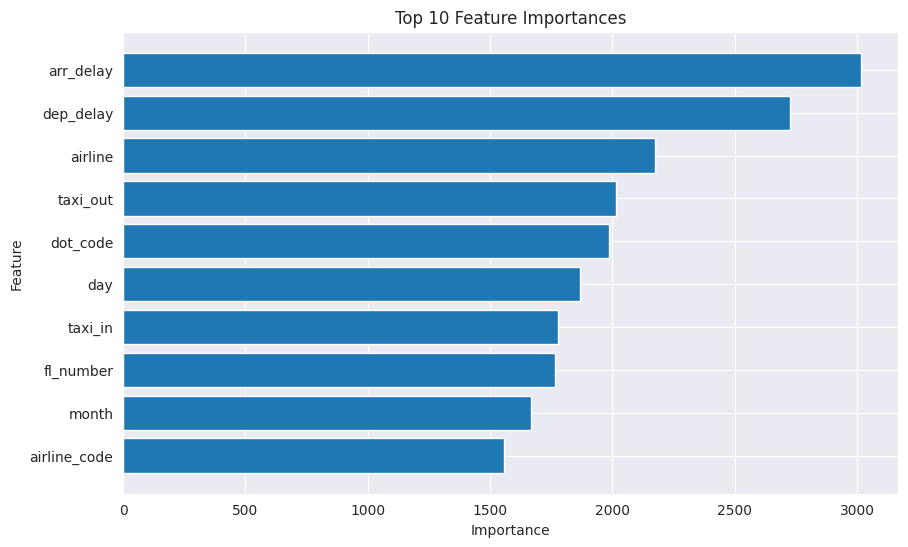

In [35]:
# Plot top 10 feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

#### Saving the preprocessed dataset for multiclass classificatiion

In [39]:
# saving the prerocessed dataset for multiclass classification to act as a checkpoint 
balanced_flight_df.to_csv("../data/Balanced_dataset_for_multiclass_classification", index=False)

#### Loading the dataset

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
flight_balanced_df = pd.read_csv("../data/Balanced_dataset_for_multiclass_classification")
flight_balanced_df.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,day,month,day_of_week,year,delay_category
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,9,1,2,2019,3
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,19,11,5,2022,3
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,22,7,4,2022,3
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,6,3,0,2023,2
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,23,2,6,2020,3
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,31,7,2,2019,0
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,11,6,6,2023,3
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,8,7,0,2019,2
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,12,2,6,2023,3
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,22,8,5,2020,3


In [6]:
# Split the dataset based on year data: training data from 2019 to 2022 and test data for 2023
train_data = flight_balanced_df[flight_balanced_df["year"] < 2023]
test_data = flight_balanced_df[flight_balanced_df["year"] == 2023]

# Drop the "year" column from both training and test sets
train_data = train_data.drop(columns=["year"])
test_data = test_data.drop(columns=["year"])

# Split the training and test sets into features (X) and target (y)
X_train = train_data.drop(columns=["delay_category"])
y_train = train_data["delay_category"]

X_test = test_data.drop(columns=["delay_category"])
y_test = test_data["delay_category"]

# Display the shapes of the resulting datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14479329, 28), (14479329,), (1894419, 28), (1894419,))

### Model Building and Evaluation

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.svm import SVC ,LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, 
    recall_score, f1_score, roc_auc_score, 
    confusion_matrix, classification_report
)


#### 1. Baseline Logistic regression

In [8]:
# multiclass learning using OvR
OvR_clf = OneVsRestClassifier(LinearSVC(random_state=42, dual=False, max_iter=5000))
OvR_clf.fit(X_train, y_train)

y_pred_ovr_clf = OvR_clf.predict(X_test)

In [9]:
# Model Evaluation for Logistic Regression
print("Multiclass with OneVsRest:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_ovr_clf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ovr_clf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ovr_clf, average='macro'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_ovr_clf, average='macro'):.4f}")

Multiclass with OneVsRest:
Accuracy: 0.5266
Precision: 0.4943
Recall: 0.5140
F1 Score: 0.4713


In [10]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_ovr_clf))
print("Classification report:\n", classification_report(y_test, y_pred_ovr_clf))

Confusion Matrix:
[[ 23906  75525  92530   4422 111747  44272]
 [ 14394 185704  13506   7606 126136  30655]
 [  7725  15049 240231   6275  23217  28417]
 [   301   3322   5615 378870   3405    391]
 [  5568  44868   8468    732  91899  20840]
 [ 11575  42666  91815   2829  52895  77043]]
Classification report:
               precision    recall  f1-score   support

           0       0.38      0.07      0.11    352402
           1       0.51      0.49      0.50    378001
           2       0.53      0.75      0.62    320914
           3       0.95      0.97      0.96    391904
           4       0.22      0.53      0.32    172375
           5       0.38      0.28      0.32    278823

    accuracy                           0.53   1894419
   macro avg       0.49      0.51      0.47   1894419
weighted avg       0.53      0.53      0.50   1894419



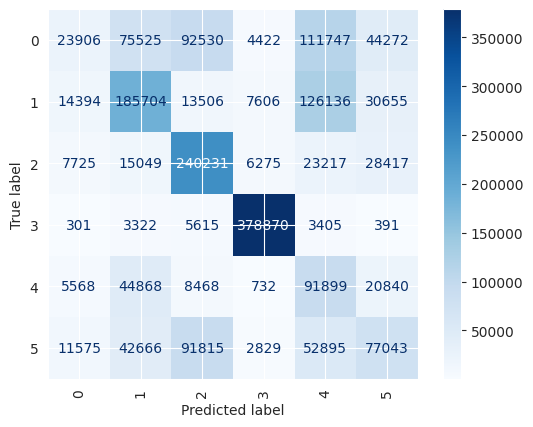

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_ovr_clf, labels=OvR_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=OvR_clf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/one_vs_rest_multiclass_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [12]:
# Save the model to a file
import joblib

joblib.dump(OvR_clf, '../models/OneVsRest_multiclass_Classifier_model.joblib')
print("OvR Classifier model Saved")

OvR Classifier model Saved


#### 2. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# model definition 
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf.predict(X_test)

In [ ]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")


Random Forest:
Accuracy: 0.9277442181567138


In [ ]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[ 66141   2737   2202   2578      3     87]
 [ 16811   8380    264   1422      1     23]
 [ 12812    683  24306   2035      2     73]
 [   367     51     57 545317      0      0]
 [   379     35      5      3     16      0]
 [  6133    417    812    246      0    882]]
Classification report:
                      precision    recall  f1-score   support

      carrier_delay       0.64      0.90      0.75     73748
late_aircraft_delay       0.68      0.31      0.43     26901
          nas_delay       0.88      0.61      0.72     39911
           no_delay       0.99      1.00      0.99    545792
     security_delay       0.73      0.04      0.07       438
      weather_delay       0.83      0.10      0.18      8490

           accuracy                           0.93    695280
          macro avg       0.79      0.49      0.52    695280
       weighted avg       0.93      0.93      0.92    695280



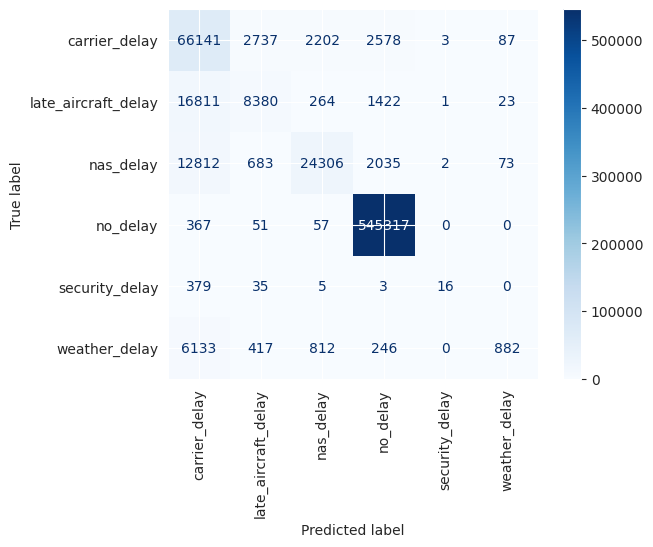

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/random_forest_multiclass_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [ ]:
# Save the model to a file
import joblib

joblib.dump(rf, '../models/RandomForest_multiclass_Classifier_model.joblib')
print("Random Forest Classifier model Saved")

### 3. HistoGradientBoosting Classifier

In [13]:
# model definition 

histogradientclf = HistGradientBoostingClassifier(random_state=42)
histogradientclf.fit(X_train, y_train)

# Evaluate the model
y_pred_hist = histogradientclf.predict(X_test)

In [14]:
# Model Evaluation for HistoGradientBoosting Classifier Model
print("\nHistGradientBoosting Classifier:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_hist):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_hist, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_hist, average='macro'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_hist, average='macro'):.4f}")



HistGradientBoosting Classifier:
Accuracy: 0.6502
Precision: 0.6282
Recall: 0.6427
F1 Score: 0.6312


In [15]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_hist))
print("\nClassification report:\n", classification_report(y_test, y_pred_hist))

Confusion Matrix:
[[127061  79334  44488   1751  32612  67156]
 [ 56650 227088   5584   2474  45508  40697]
 [ 32183  13338 220362   2616  10522  41893]
 [   771   2165   2053 386666     39    210]
 [  7367  31343    585    258 113315  19507]
 [ 31271  32467  32349   1008  24477 157251]]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.36      0.42    352402
           1       0.59      0.60      0.59    378001
           2       0.72      0.69      0.70    320914
           3       0.98      0.99      0.98    391904
           4       0.50      0.66      0.57    172375
           5       0.48      0.56      0.52    278823

    accuracy                           0.65   1894419
   macro avg       0.63      0.64      0.63   1894419
weighted avg       0.65      0.65      0.65   1894419



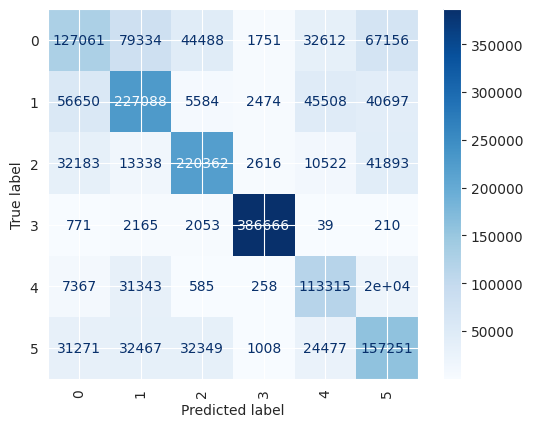

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_hist, labels=histogradientclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=histogradientclf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/hist_gradient_boosting_classifier_multiclass_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [17]:
# Save the model to a file
import joblib

joblib.dump(histogradientclf, '../models/HistGradientBoosting_multiclass_Classifier_model.joblib')
print("Hist GradientBoosting Classifier model Saved")

Hist GradientBoosting Classifier model Saved


#### 3. Gradient Boost Classifier

In [18]:
# Model definition

xgb = XGBClassifier(random_state=142)
xgb.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb.predict(X_test)

In [19]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb,  average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb,  average='macro'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb,  average='macro'):.4f}")


Gradient Boosting Machine (XGBoost):
Accuracy: 0.6540
Precision: 0.6316
Recall: 0.6473
F1 Score: 0.6353


In [20]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_xgb))
print("Classification report:\n", classification_report(y_test, y_pred_xgb))

Confusion Matrix:
[[129713  78292  45440   1972  32049  64936]
 [ 55976 227411   6443   2656  47078  38437]
 [ 31896  13077 222328   2799   9912  40902]
 [   640   2163   2182 386664     26    229]
 [  8328  28675    522    370 115537  18943]
 [ 31893  31950  32067   1300  24231 157382]]
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.42    352402
           1       0.60      0.60      0.60    378001
           2       0.72      0.69      0.71    320914
           3       0.98      0.99      0.98    391904
           4       0.50      0.67      0.58    172375
           5       0.49      0.56      0.52    278823

    accuracy                           0.65   1894419
   macro avg       0.63      0.65      0.64   1894419
weighted avg       0.65      0.65      0.65   1894419



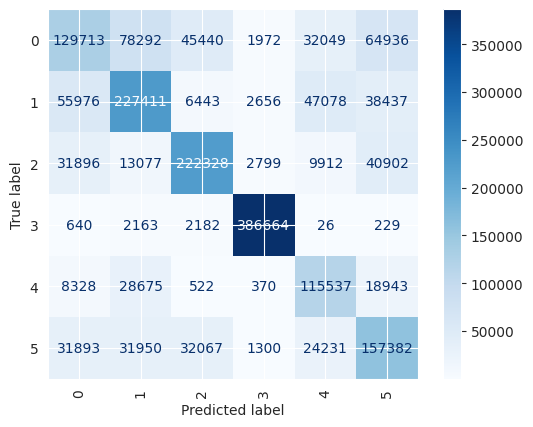

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/XGBoost_machine_multiclass_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [22]:
# Save the model to a file
import joblib

joblib.dump(histogradientclf, '../models/XGBoosting_multiclass_Classifier_model.joblib')
print("XGB GradientBoosting Classifier model Saved")

XGB GradientBoosting Classifier model Saved


#### 3. Neural Network Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2025-01-03 12:27:43.271230: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 12:27:43.366160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735907263.406584    1828 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735907263.417381    1828 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-03 12:27:43.510516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [24]:
# One-hot encode target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
# Define the neural network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Number of classes
])

model.summary()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-03 12:27:45.155197: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,134 (16.15 KB)

 Trainable params: 4,134 (16.15 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
# Train the neural network
history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.2, 
    epochs=20, 
    batch_size=128, 
    verbose=1
)

Epoch 1/20
 1723/90496 ━━━━━━━━━━━━━━━━━━━━ 1:18 879us/step - accuracy: 0.5088 - loss: 1.1707

90496/90496 ━━━━━━━━━━━━━━━━━━━━ 96s 1ms/step - accuracy: 0.6739 - loss: 0.7631 - val_accuracy: 0.1287 - val_loss: 4.4324
Epoch 2/20
90496/90496 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - accuracy: 0.7264 - loss: 0.6367 - val_accuracy: 0.1543 - val_loss: 4.2975
Epoch 3/20
90496/90496 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - accuracy: 0.7328 - loss: 0.6209 - val_accuracy: 0.1521 - val_loss: 4.7221
Epoch 4/20
90496/90496 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - accuracy: 0.7364 - loss: 0.6116 - val_accuracy: 0.1536 - val_loss: 4.1314
Epoch 5/20
90496/90496 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - accuracy: 0.7387 - loss: 0.6056 - val_accuracy: 0.1568 - val_loss: 4.4551
Epoch 6/20
90496/90496 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - accuracy: 0.7406 - loss: 0.6012 - val_accuracy: 0.1460 - val_loss: 4.3040
Epoch 7/20
90496/90496 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - accuracy: 0.7417 - loss: 0.5978 - val_accuracy: 0.1518 - val_loss: 4.6435
Epoch 8/20
90496/90496 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - accuracy: 0.7424 - lo

In [28]:
# Save the trained model
model.save('../models/flight_delay_model.h5')
print("Model saved to 'flight_delay_model.h5'")

Model saved to 'flight_delay_model.h5'


In [ ]:
# Save the trained model in the recommended native Keras format
model.save('../models/flight_delay_model.keras')
print("Model saved to 'flight_delay_model.keras'")